TASK : Predicting the percentage of marks that a student is expected to score based upon the number of hours they studied

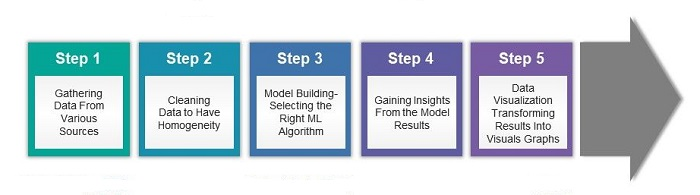

                                            Steps in Data Science Process

In [97]:
# Importing all required libraries

import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline


In [98]:
# Reading data from scores.csv file

data = pd.read_csv('/Users/Admin/SPARKS/scores.csv')
print("Data imported successfully")


Data imported successfully


In [99]:
# Checking first 10 rows of dataset

data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Exploratory Data Analysis

In [100]:
# Printing a summary of dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


<AxesSubplot:>

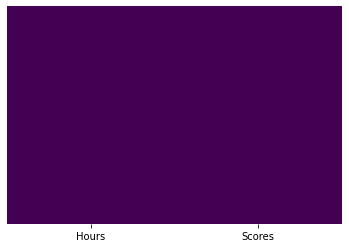

In [101]:
# Checking null values in data 

sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

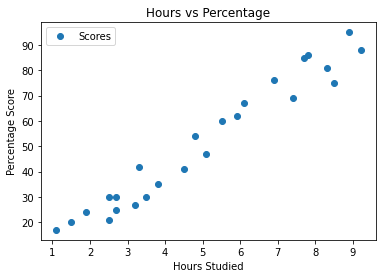

In [102]:
# Plotting the distribution of scores

data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the above graph we can see that there is linear relation between percentage and number of hours studied

<AxesSubplot:title={'center':'Correlation Heatmap'}>

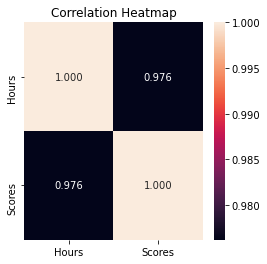

In [103]:
# Correlation heatmap to show relation b/w variables

plt.figure(figsize=(4,4)) 
plt.title('Correlation Heatmap')
sns.heatmap(data.corr(),annot=True, fmt=".3f")

From the heatmap, we can see that scores and no. of hours studied are highly correlated positively (in light colour) 

In [104]:
# Dividing the dataset into attributes and labels

X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 

In [105]:
# Splitting the dataset into test and training data

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

# Training the model

In [106]:

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


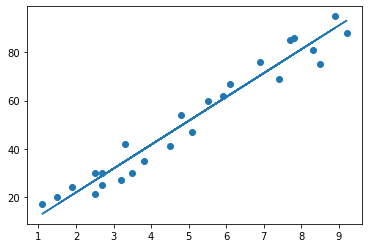

In [107]:
# Plotting the regression line

line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

# Predictions

In [108]:
print(X_test) # Testing data
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [109]:
# Printing actual and predicted score

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [110]:
# Testing data against given value

h = 9.25
own_pred = regressor.predict(np.array([h]).reshape(1, 1))
print("No of Hours = {}".format(h))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


# Model Evaluation

In [111]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982


Low MAE value means that our model has predicted correctly and deviation is less